In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
bank_data = pd.read_csv("D:/Python Materials/18-Logistic-Regression-in-Jupyter-notebook/bank-additional-full.csv", sep=';')

In [3]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_data.shape

(41188, 21)

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
bank_data.isnull().sum() # Checking for null value

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
bank_data.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

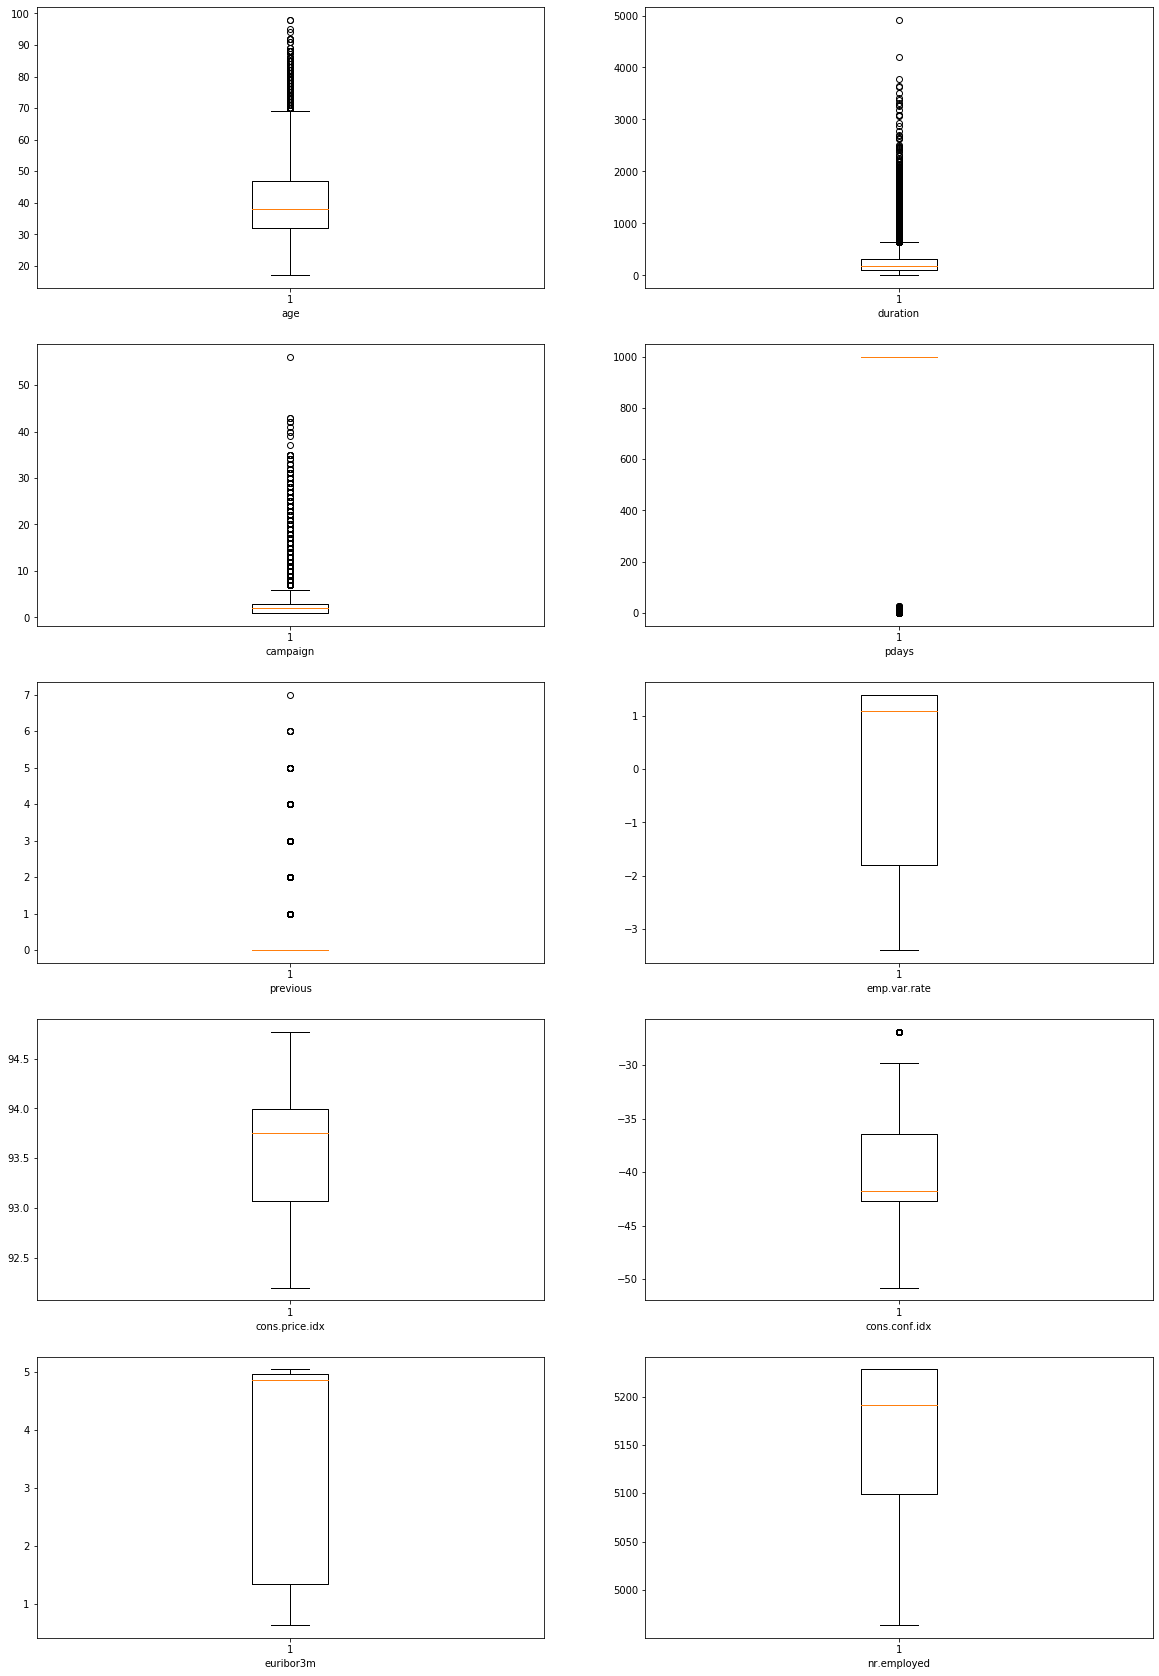

In [9]:
fig = plt.figure(figsize=(20,30))
row = 5
col = 2
pos = 1
for col_name in bank_data.columns.tolist():
    if bank_data[col_name].dtype != 'O':
        fig.add_subplot(row,col,pos)
        pos = pos + 1
        plt.boxplot(bank_data[col_name])
        plt.xlabel(col_name)

In [12]:
def outlier(df):
    outlier={}
    for col_name in df.columns.tolist():
        if df[col_name].dtype != 'O':
            Q1,Q3=np.percentile(df[col_name],[25,75])
            IQR=Q3-Q1
            upper_bound=Q3+(1.5*IQR)
            lower_bound=Q1-(1.5*IQR)
            outlier[col_name]=[upper_bound, lower_bound]
    return outlier

outlier(bank_data)

{'age': [69.5, 9.5],
 'duration': [644.5, -223.5],
 'campaign': [6.0, -2.0],
 'pdays': [999.0, 999.0],
 'previous': [0.0, 0.0],
 'emp.var.rate': [6.200000000000001, -6.6000000000000005],
 'cons.price.idx': [95.3725, 91.69650000000001],
 'cons.conf.idx': [-26.949999999999992, -52.150000000000006],
 'euribor3m': [10.3865, -4.081499999999999],
 'nr.employed': [5421.6, 4905.6]}

In [14]:
bank_data[bank_data['age']>70].shape

(422, 21)

In [15]:
bank_data[bank_data['duration']>645].shape

(2955, 21)

In [16]:
bank_data[bank_data['campaign']>6].shape

(2406, 21)

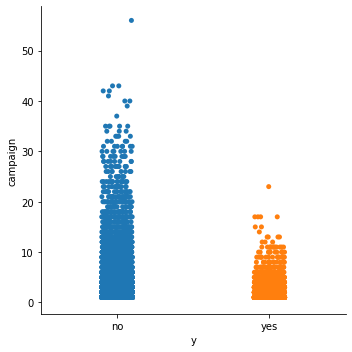

In [21]:
sb.catplot(x='y',y='campaign',data=bank_data) # Swamp Plot

In [22]:
import scipy.stats as stat

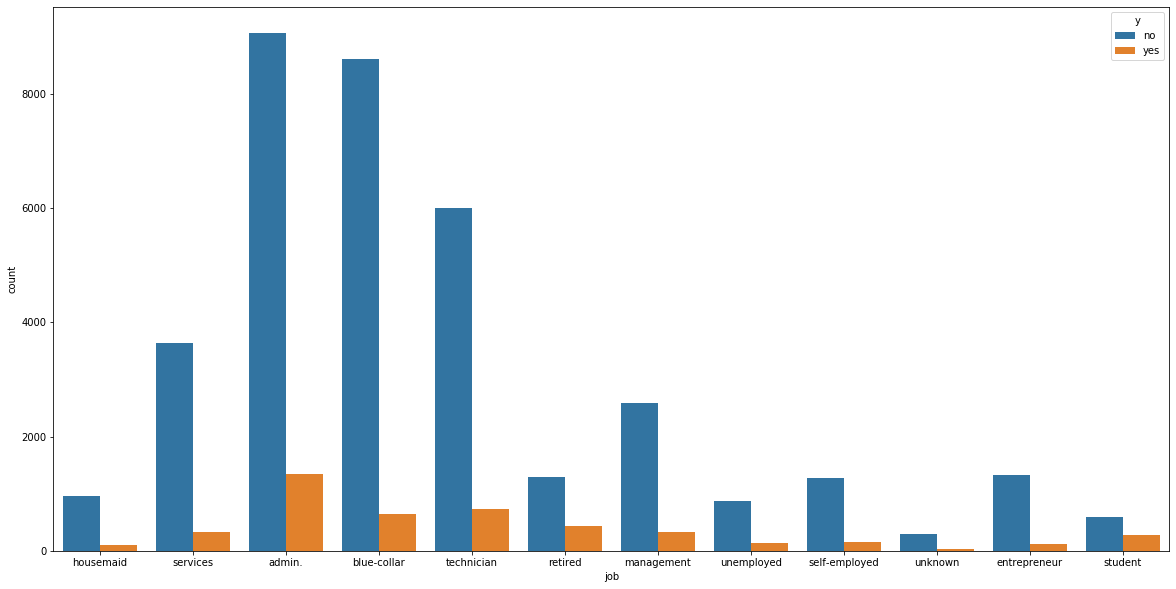

In [27]:
fig = plt.figure(figsize=(20,10))
sb.countplot(bank_data['job'],hue=bank_data['y'])

In [30]:
cross_tab_data = pd.crosstab(bank_data['job'],bank_data['y'])

In [32]:
cross_tab_data

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [36]:
chi2,p,dof,expected = stat.chi2_contingency(cross_tab_data)

In [37]:
p

4.189763287563623e-199